In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D

In [2]:
blocked = pd.read_csv("blocked.csv")
blocked.head()

,extension,url,avg_memory_used,avg_num_blocked,avg_load_time
0,Adguard,https://www.hao123.com/,10.779929,3.2,9.862131
1,Adguard,https://www.yahoo.com/,27.393715,8.3,1.722080
2,Adguard,http://www.excite.com/,12.809727,1.0,1.504689
3,Adguard,https://www.aol.com/,31.141832,26.8,3.147949
4,Adguard,https://web.de/,16.241968,15.5,4.183974


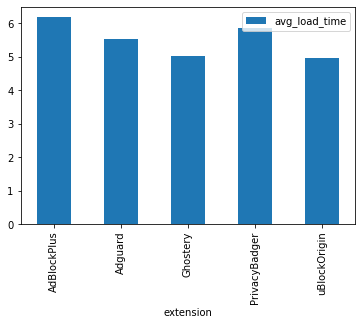

In [3]:
memory = blocked[['extension','url','avg_load_time']]
memory.groupby('extension').mean().plot.bar()

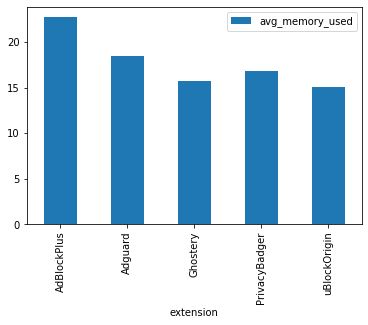

In [4]:
memory = blocked[['extension','url','avg_memory_used']]
memory.groupby('extension').mean().plot.bar()

In [5]:
unblocked = pd.read_csv("unblocked.csv")
unblocked.head()

,url,avg_memory_used,avg_load_time
0,https://www.hao123.com/,9.193145,42.204911
1,https://www.yahoo.com/,25.843900,3.320599
2,http://www.excite.com/,21.328179,4.228599
3,https://www.aol.com/,38.022229,14.411336
4,https://web.de/,23.418251,7.606568


   AdBlockPlus   Ghostery   Adguard  PrivacyBadger  uBlockOrigin  No Blocker
0    10.018979  10.017069  9.862131       9.972353      9.226797   42.204911
1     1.776468   1.695016  1.722080       2.566829      3.162504    3.320599
2     2.071216   3.655033  1.504689       2.202914      2.412277    4.228599
3     3.715545   1.754103  3.147949       2.442135      2.780018   14.411336
4     4.582225   3.572430  4.183974       5.146460      4.007916    7.606568
20


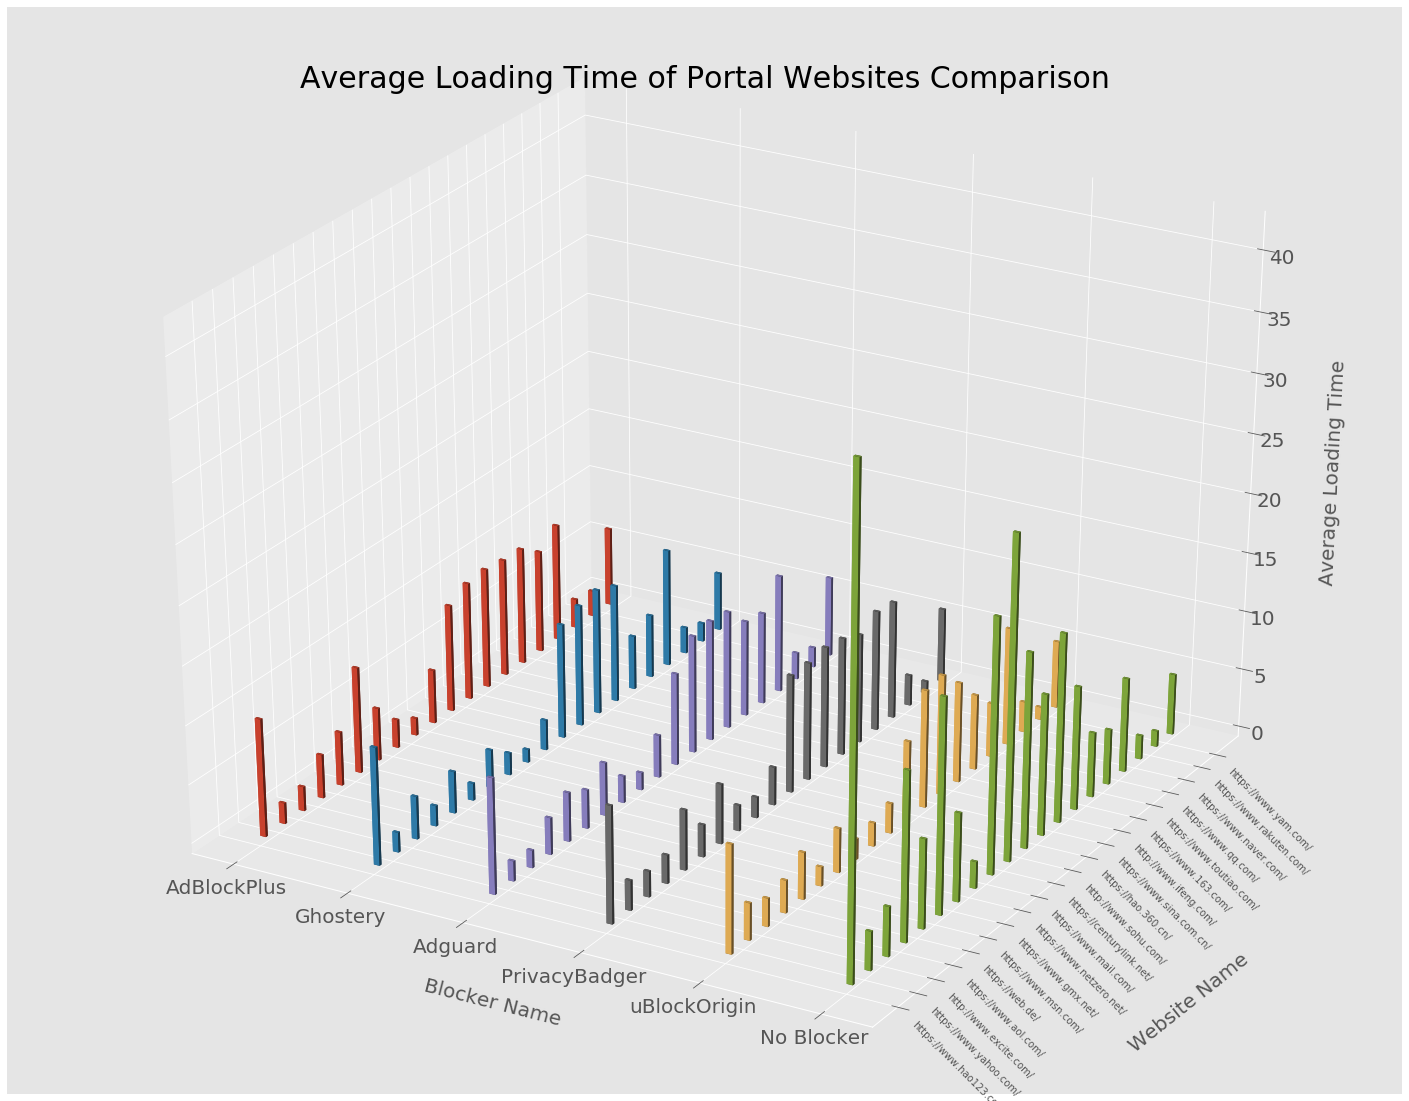

In [6]:
plt.style.use('ggplot')
blockers = ['AdBlockPlus','Ghostery','Adguard','PrivacyBadger','uBlockOrigin','No Blocker']
f = open("urls/portal.txt")
websites = [i.strip() for i in f.readlines()]
f.close()
nums = [[],[],[],[],[],[]]

with open("blocked.csv", "r") as f:
    f.readline()
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(",")
        nums[blockers.index(line[0])].append(line[4])
        
with open('unblocked.csv', 'r') as f:
    f.readline()
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(",")
        nums[5].append(line[2])


df = pd.DataFrame({
    'AdBlockPlus':nums[0],
    'Ghostery':nums[1],
    'Adguard':nums[2],
    'PrivacyBadger':nums[3],
    'uBlockOrigin':nums[4],
    'No Blocker':nums[5],
})
df = df.astype('float64')
print(df.head())
print(len(df))

fig=plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection='3d')

for i in range(6):
    ax.bar3d([i]*20, range(20), [0]*20, 0.05, 0.1, df[blockers[i]].values)

ax.set_xticks(range(6))
ax.set_xticklabels(blockers)
ax.set_xlabel("Blocker Name", fontdict = {'fontsize' : 20}, labelpad=30)
ax.set_yticks(range(20))
ax.set_yticklabels(websites)
ax.set_ylabel("Website Name", fontdict={'fontsize': 20}, labelpad=100)
ax.set_zlabel('Average Loading Time', fontdict={'fontsize':20}, labelpad=30)
plt.setp(ax.yaxis.get_majorticklabels(), rotation=-45, ha="left")
plt.title("Average Loading Time of Portal Websites Comparison", fontdict = {'fontsize' : 30})
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

plt.show()

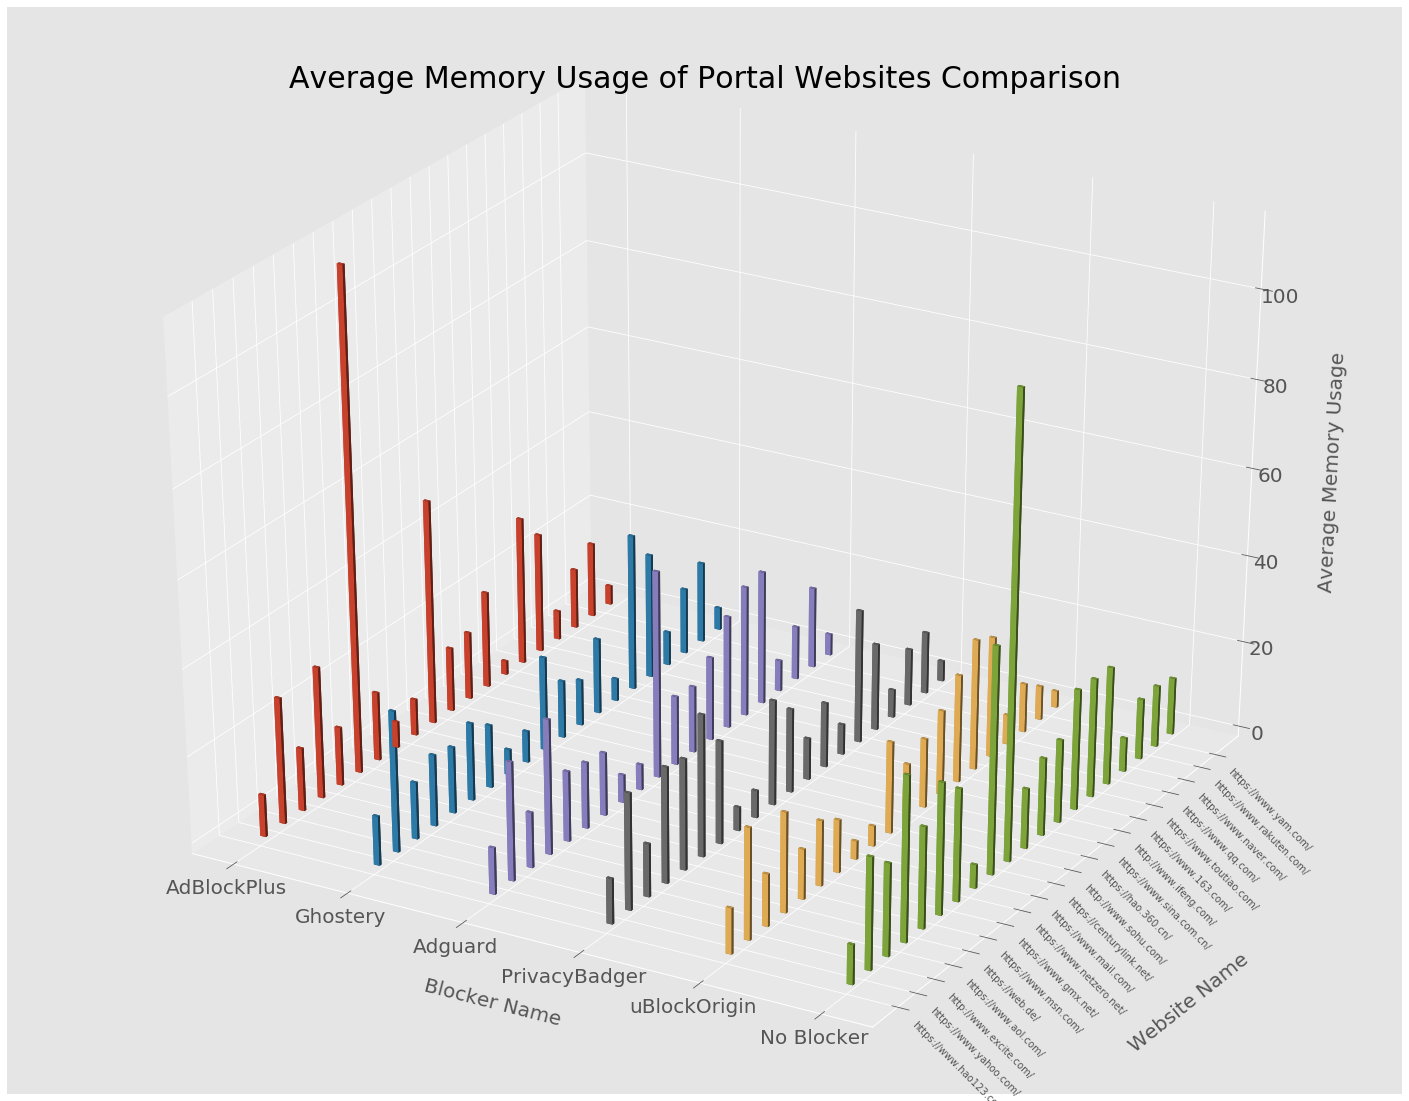

In [7]:
plt.style.use('ggplot')
blockers = ['AdBlockPlus','Ghostery','Adguard','PrivacyBadger','uBlockOrigin', 'No Blocker']
f = open("urls/portal.txt")
websites = [i.strip() for i in f.readlines()]
f.close()
nums = [[],[],[],[],[],[]]

with open("blocked.csv", "r") as f:
    f.readline()
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(",")
        nums[blockers.index(line[0])].append(line[2])
with open('unblocked.csv', 'r') as f:
    f.readline()
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(",")
        nums[5].append(line[1])
        

df = pd.DataFrame({
    'AdBlockPlus':nums[0],
    'Ghostery':nums[1],
    'Adguard':nums[2],
    'PrivacyBadger':nums[3],
    'uBlockOrigin':nums[4],
    'No Blocker':nums[5]
})
df = df.astype('float64')

fig=plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection='3d')

for i in range(6):
    ax.bar3d([i]*20, range(20), [0]*20, 0.05, 0.1, df[blockers[i]].values)

ax.set_xticks(range(6))
ax.set_xticklabels(blockers)
ax.set_xlabel("Blocker Name", fontdict = {'fontsize' : 20}, labelpad=30)
ax.set_yticks(range(20))
ax.set_yticklabels(websites)
ax.set_ylabel("Website Name", fontdict={'fontsize': 20}, labelpad=100)
ax.set_zlabel('Average Memory Usage', fontdict={'fontsize':20}, labelpad=30)
plt.setp(ax.yaxis.get_majorticklabels(), rotation=-45, ha="left")
plt.title("Average Memory Usage of Portal Websites Comparison", fontdict = {'fontsize' : 30})
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

plt.show()

   AdBlockPlus  Ghostery  Adguard  PrivacyBadger  uBlockOrigin
0          2.2       1.8      3.2            8.1          14.8
1         13.7      11.0      8.3           17.4          14.4
2          3.4       0.8      1.0            3.0           3.6
3         21.7       8.0     26.8           18.1          33.7
4         19.0       6.0     15.5            5.3          16.3
20


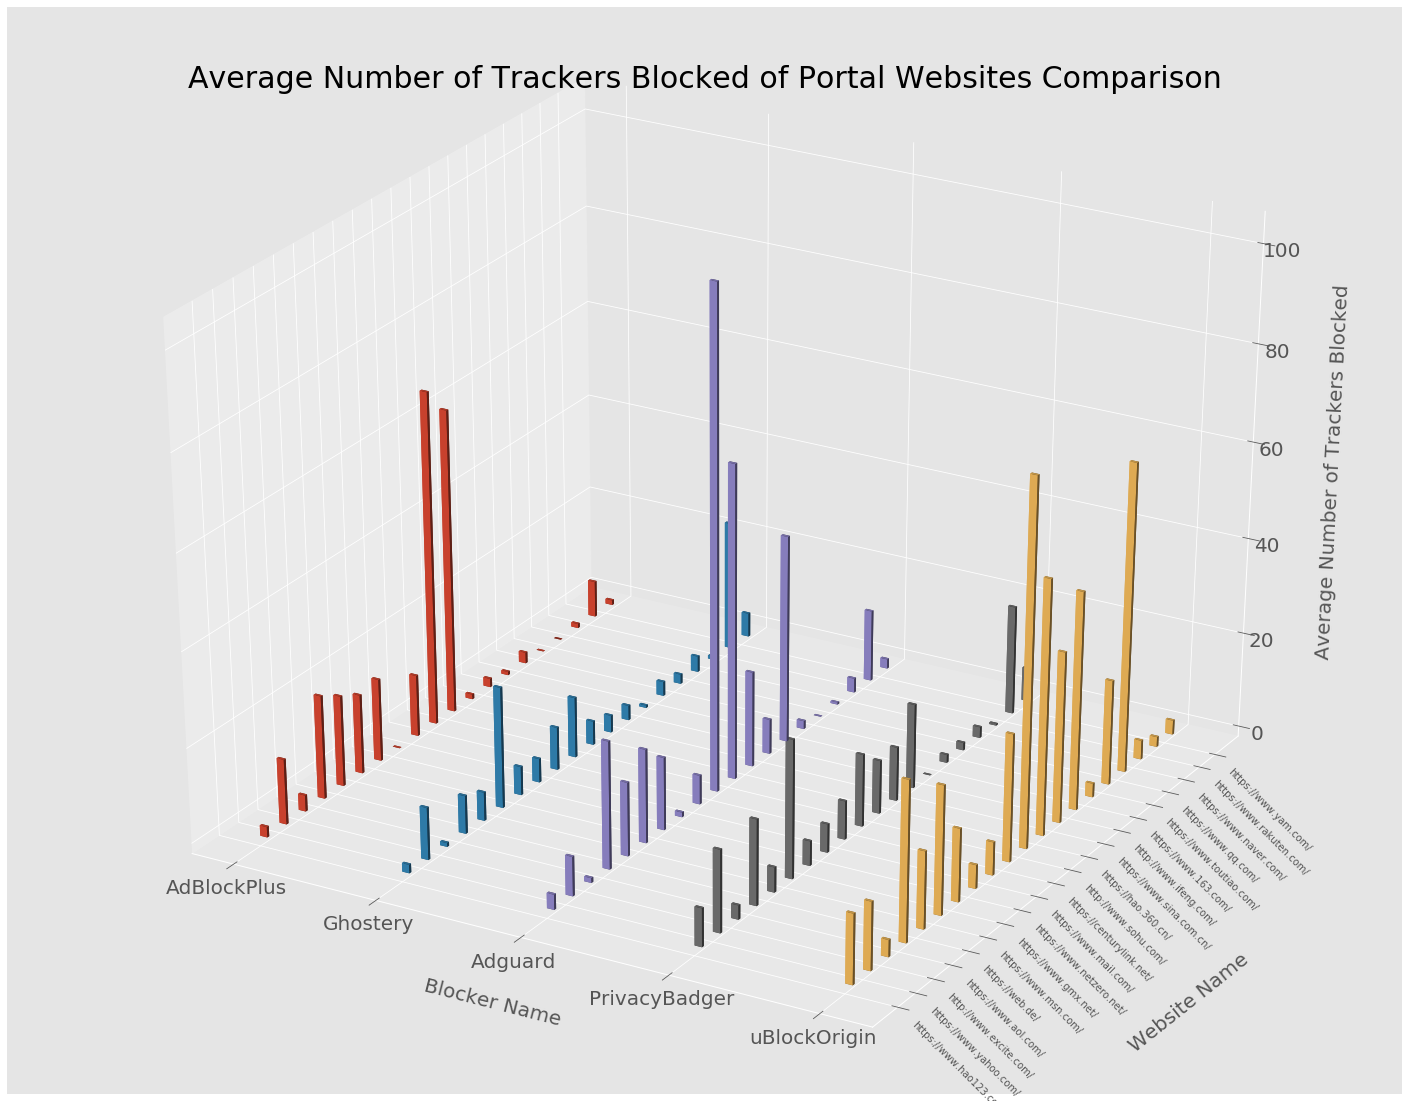

In [8]:
plt.style.use('ggplot')
blockers = ['AdBlockPlus','Ghostery','Adguard','PrivacyBadger','uBlockOrigin']
f = open("urls/portal.txt")
websites = [i.strip() for i in f.readlines()]
f.close()
nums = [[],[],[],[],[],[]]
with open("blocked.csv", "r") as f:
    f.readline()
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(",")
        nums[blockers.index(line[0])].append(line[3])

        

df = pd.DataFrame({
    'AdBlockPlus':nums[0],
    'Ghostery':nums[1],
    'Adguard':nums[2],
    'PrivacyBadger':nums[3],
    'uBlockOrigin':nums[4]
})
df = df.astype('float64')
print(df.head())
print(len(df))

fig=plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection='3d')

for i in range(5):
    ax.bar3d([i]*20, range(20), [0]*20, 0.05, 0.1, df[blockers[i]].values)

ax.set_xticks(range(5))
ax.set_xticklabels(blockers)
ax.set_xlabel("Blocker Name", fontdict = {'fontsize' : 20}, labelpad=30)
ax.set_yticks(range(20))
ax.set_yticklabels(websites)
ax.set_ylabel("Website Name", fontdict={'fontsize': 20}, labelpad=100)
ax.set_zlabel('Average Number of Trackers Blocked', fontdict={'fontsize':20}, labelpad=30)
plt.setp(ax.yaxis.get_majorticklabels(), rotation=-45, ha="left")
plt.title("Average Number of Trackers Blocked of Portal Websites Comparison", fontdict = {'fontsize' : 30})
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

plt.show()